# Анализ убытков приложения ProcrastinatePRO+

**Запрос на исследование**

Вы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев ваш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Вам нужно разобраться в причинах этой ситуации.

У вас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Вам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

**Задачи исследования:**

**Загрузка данных и подготовка их к анализу**

Загрузить данные о визитах, заказах и расходах в переменные. Оптимизировать данные для анализа. Убедиться, что тип данных в каждой колонке — правильный. Путь к файлам:

- /datasets/visits_info_short.csv
- /datasets/orders_info_short.csv
- /datasets/costs_info_short.csv
 
**Задать функции для расчета и анализа LTV, ROI, удержания и конверсии**

Оптимизировать готовые функции для расчета показателей для рассчета и анализа LTV, ROI, удержания и конверсии. 

**Проведение исследовательского анализа данных**

Построить профили пользователей. Определить минимальную и максимальную дату привлечения пользователей.

Выяснить:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

**Маркетинг**

Выяснить:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

**Оценить окупаемость рекламы для привлечения пользователей**

С помощью LTV и ROI:
- Проанализировать общую окупаемость рекламы;
- Проанализировать окупаемость рекламы с разбивкой по устройствам;
- Проанализировать окупаемость рекламы с разбивкой по странам;
- Проанализировать окупаемость рекламы с разбивкой по рекламным каналам.

Описать обнаруженные проблемы. Ответить на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Описать возможные причины обнаруженных проблем и сформировать рекомендации для рекламного отдела. 

При решении этой задачи, будем использовать весь объем данных в период от 1-го мая 2019 по 1-ое ноября 2019 года при условии, что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

Решить вопрос, необходимо ли включать в анализ органических пользователей.

**Написать выводы**
- Выделить причины неэффективности привлечения пользователей;
- Сформировать рекомендации для отдела маркетинга для повышения эффективности.

## Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Загрузка и предобработка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import GridspecLayout


# устанавливаем формат отображения таблицы и данных
pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_columns = 100
pd.options.mode.chained_assignment = None
sns.set_palette('Set2')
sns.set_style('darkgrid')

In [2]:
# загрузка данных
visits = pd.read_csv('/datasets/visits_info_short.csv') # журнал сессий 
orders = pd.read_csv('/datasets/orders_info_short.csv') # покупки
costs = pd.read_csv('/datasets/costs_info_short.csv') # расходы на рекламу

In [3]:
# чтение данных и вывод информации о таблицах
# изучение таблицы 'visits'
print('Таблица visits_log_short')
display(visits.head())
temp_visits = visits.copy() 
list_c = visits.columns
print(temp_visits.info())
print('-------------------------')
print('кол-во дубликатов:',temp_visits.duplicated().sum())
for col_l in list_c:
    print('-------------------------')
    print(col_l, temp_visits[col_l].sort_values().unique())
    print('уникальных значений:', len(temp_visits[col_l].unique()))
    print(col_l,': кол-во NaN',temp_visits[col_l].isna().sum(),
        ', процент NaN', round(temp_visits[col_l].isna().sum()/len(temp_visits)*100, 2),'%')
print('\n')

# изучение таблицы 'orders'
print('Таблица orders_log_short ')
display(orders.head())
temp_orders = orders.copy() 
list_c = orders.columns
print(temp_orders.info())
print('-------------------------')
print('кол-во дубликатов:',temp_orders.duplicated().sum())
for col_l in list_c:
    print('-------------------------')
    print(col_l, temp_orders[col_l].sort_values().unique())
    print('уникальных значений:', len(temp_orders[col_l].unique()))
    print(col_l,': кол-во NaN',temp_orders[col_l].isna().sum(),
        ', процент NaN', round(temp_orders[col_l].isna().sum()/len(temp_orders)*100, 2),'%')
print('\n')

# изучение таблицы 'costs'
print('Таблица costs_short ')
display(costs.head())
temp_costs = costs.copy() 
list_c = costs.columns
print(temp_costs.info())
print('-------------------------')
print('кол-во дубликатов:',temp_costs.duplicated().sum())
for col_l in list_c:
    print('-------------------------')
    print(col_l, temp_costs[col_l].sort_values().unique())
    print('уникальных значений:', len(temp_costs[col_l].unique()))
    print(col_l,': кол-во NaN',temp_costs[col_l].isna().sum(),
        ', процент NaN', round(temp_costs[col_l].isna().sum()/len(temp_costs)*100, 2),'%')

Таблица visits_log_short


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
-------------------------
кол-во дубликатов: 0
-------------------------
User Id [      599326      4919697      6085896 ... 999976332130 999979924135
 999999563947]
уникальных значений: 150008
User Id : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
Region ['France' 'Germany' 'UK' 'United States']
уникальных значений: 4
Region : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
Device ['Android' 'Mac' 'PC' 'iPhone']
уникальных значений: 4
Device : кол-во N

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.990
1,174361394180,2019-05-01 12:24:04,4.990
2,529610067795,2019-05-01 11:34:04,4.990
3,319939546352,2019-05-01 15:34:40,4.990
4,366000285810,2019-05-01 13:59:51,4.990


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
-------------------------
кол-во дубликатов: 0
-------------------------
User Id [      599326     46006712    374052872 ... 999659859721 999779032958
 999895427370]
уникальных значений: 8881
User Id : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
Event Dt ['2019-05-01 00:28:11' '2019-05-01 01:56:28' '2019-05-01 02:02:18' ...
 '2019-10-31 23:33:38' '2019-10-31 23:43:41' '2019-10-31 23:56:56']
уникальных значений: 40163
Event Dt : кол-во NaN 0 , процент NaN 0.0 %
-------------------------
Revenue [ 4.99  5.99  9.99 19.99 49.99]
уникальных значений: 5
Revenue : кол-во NaN 0 , процент NaN 0.0 %


Таблица costs_

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.300
1,2019-05-02,FaceBoom,78.100
2,2019-05-03,FaceBoom,85.800
3,2019-05-04,FaceBoom,136.400
4,2019-05-05,FaceBoom,122.100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
-------------------------
кол-во дубликатов: 0
-------------------------
dt ['2019-05-01' '2019-05-02' '2019-05-03' '2019-05-04' '2019-05-05'
 '2019-05-06' '2019-05-07' '2019-05-08' '2019-05-09' '2019-05-10'
 '2019-05-11' '2019-05-12' '2019-05-13' '2019-05-14' '2019-05-15'
 '2019-05-16' '2019-05-17' '2019-05-18' '2019-05-19' '2019-05-20'
 '2019-05-21' '2019-05-22' '2019-05-23' '2019-05-24' '2019-05-25'
 '2019-05-26' '2019-05-27' '2019-05-28' '2019-05-29' '2019-05-30'
 '2019-05-31' '2019-06-01' '2019-06-02' '2019-06-03' '2019-06-04'
 '2019-06-05' '2019-06-06' '2019-06-07' '2019-06-08' '2019-06-09'
 '2019-06-10' '2019-06-11' '2019-06-12' '2

**Результаты обзора данных:**

По итогам обзора данных были приняты решения по дальнейшей обработке данных:

Таблица `visits`:
- Привести наименования столбцов к стилю snake_case
- Данные столбцов `Session Start` и `Session End` привести к типу данных **datetime**
- В столбце `Region` заменить значение **United States** на **USA**

Таблица `orders`:
- Привести наименования столбцов к стилю snake_case
- Данные столбца `Event Dt` привести к типу данных **datetime**

Таблица `costs`:
- Привести наименования столбцов к стилю snake_case
- Данные столбца `dt` привести к типу данных **datetime**

Произведем обработку данных:

In [4]:
# приведение наименований столбцов к общепринятому стилю
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.lower().str.replace(' ', '_')

# преобразование данных о времени для дальнейших расчётов
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# замена наименования региона на сокращенное
visits = visits.replace({'region':{'United States':'USA'}})

# вывод итоговых таблиц
display(visits.head(5))
visits.info()
display(orders.head(5))
orders.info()
display(costs.head(5))
costs.info()

,user_id,region,device,channel,session_start,session_end
0,981449118918,USA,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,USA,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,USA,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,USA,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,USA,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.990
1,174361394180,2019-05-01 12:24:04,4.990
2,529610067795,2019-05-01 11:34:04,4.990
3,319939546352,2019-05-01 15:34:40,4.990
4,366000285810,2019-05-01 13:59:51,4.990


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.300
1,2019-05-02,FaceBoom,78.100
2,2019-05-03,FaceBoom,85.800
3,2019-05-04,FaceBoom,136.400
4,2019-05-05,FaceBoom,122.100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Результаты предобработки данных:**

В ходе предобработки данных были внесены следующие изменения в исходные таблицы:

Таблица `visits`:
- Приведены наименования столбцов к стилю snake_case
- Данные столбцов `Session Start` и `Session End` приведены к типу данных **datetime**
- В столбце `Region` заменены значения **United States** на **USA**

Таблица `orders`:
- Приведены наименования столбцов к стилю snake_case
- Данные столбца `Event Dt` приведены к типу данных **datetime**

Таблица `costs`:
- Приведены наименования столбцов к стилю snake_case
- Данные столбца `dt` приведены к типу данных **datetime**

`Примечание:` Дубликтов и пропусков в исходных таблицах не обнаружено.

## Функции для расчета и анализа бизнес-показателей

Зададим функции для создания профилей, расчёта удержания, конверсии, LTV и ROI и их визуализации

### Функции для создания профилей, расчёта удержания, конверсии, LTV и ROI

`get_profiles()`

In [5]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

`get_retention()`

In [6]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


`get_conversion()`

In [7]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

`get_ltv()`

In [8]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функции для визуализации удержания, конверсии, LTV и ROI

`filter_data()`

In [9]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

`plot_retention()`

In [10]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

`plot_conversion()`

In [11]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

`plot_ltv_roi()`

In [12]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [13]:
# строим профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,USA,2019-05-07,2019-05-01,True,1.088
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,USA,2019-07-09,2019-07-01,False,1.107
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,USA,2019-10-02,2019-10-01,False,0.231


Согласно запросу на исследование, в нашем распоряжении имеется информация о привлеченных пользователях с 01.05.2019 по 27.10.2019. Проверим, так ли это. Определим минимальную и максимальную - без учета и с учетом горизонта анлиза, дату привлечения пользователей.

In [14]:
profiles['dt'].max()

datetime.date(2019, 10, 27)

In [15]:
# задаём момент и горизонт анализа данных
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

# считаем удержание без учета горизонта анализа
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, ignore_horizon=True
)

min_date = retention_history.reset_index()['dt'].min().date()
max_date = retention_history.reset_index()['dt'].max().date()

# считаем удержание
retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

# определяем максимальную дату привлечения пользователей с учетом горизонта анализа
max_acquisition_date = retention_history.reset_index()['dt'].max().date()

print('минимальная дата привлечения пользователей:', min_date)
print('максимальная дата привлечения пользователей без учета горизонта анализа:', max_date)
print('максимальная дата привлечения пользователей с учетом горизонта анализа:', max_acquisition_date)

минимальная дата привлечения пользователей: 2019-05-01
максимальная дата привлечения пользователей без учета горизонта анализа: 2019-10-27
максимальная дата привлечения пользователей с учетом горизонта анализа: 2019-10-19


Определим из каких стран были привлечены пользователи и где больше всего платящих пользователей.

In [16]:
def attraction(column, category):
    pivot = (
        profiles.pivot_table(index=column,
                             columns='payer', 
                             values='user_id', 
                             aggfunc='nunique').
        sort_values(by=[0], ascending=False)
    )
    
    pivot['total'] = pivot[0]+pivot[1]
    pivot = pivot.rename(columns={0: 'not_paying_users', 1:'paying_users'})
    pivot = pivot.rename_axis(None, axis=1)
    pivot['share_of_paying'] = (pivot['paying_users']/pivot['total']*100)
    pivot = pivot.sort_values(by=['share_of_paying'], ascending=False)
    pivot = pivot.reset_index()
    
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,8))
    plt.suptitle('Распределение пользователей по ' + category)
        
    labels = pivot[column]
    total = pivot['total']
    paying = pivot['paying_users']
    share = pivot['share_of_paying']
        
    ax1.pie(total, labels=labels, autopct='%1.0f%%', shadow=True)
    ax1.set_title('Общее распредление привлеченных пользователей')
        
    ax2.pie(paying, labels=labels, autopct='%1.0f%%', shadow=True)
    ax2.set_title('Распределение платящих пользователей')
    
    ax3.pie(share, labels=labels, autopct='%1.0f%%', shadow=True)
    ax3.set_title('Соотношение платящих пользователей')
    
    plt.tight_layout()    
    plt.show()
    display(pivot)

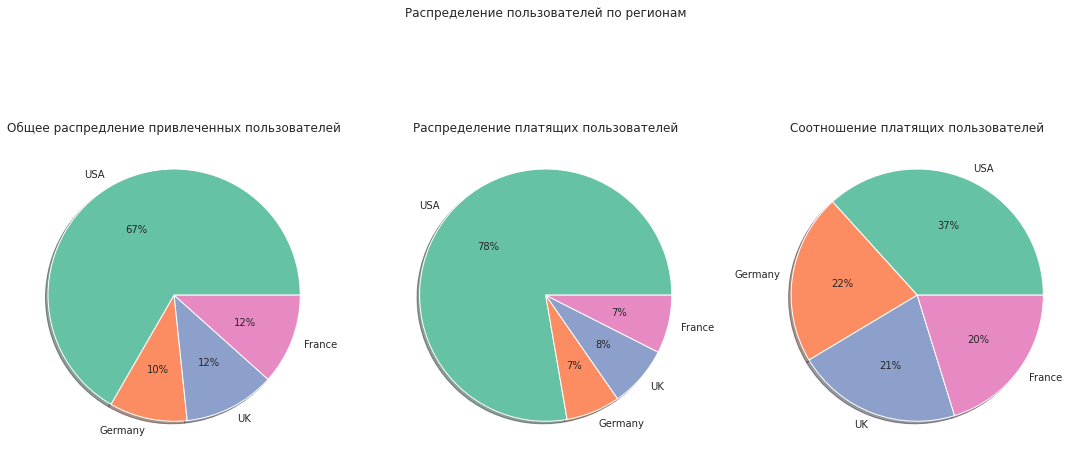

,region,not_paying_users,paying_users,total,share_of_paying
0,USA,93100,6902,100002,6.902
1,Germany,14365,616,14981,4.112
2,UK,16875,700,17575,3.983
3,France,16787,663,17450,3.799


In [17]:
attraction('region', 'регионам')

Наибольшая часть пользователей приложения зарегистрирована в США. Этому количеству существенно уступает число пользователей из Европы и Великобритании.

Аналогичная ситуация набюдается и по платящим пользователям. Число платящих пользователей из США почти в 10 раз превышает число платящих пользователей из других стран.

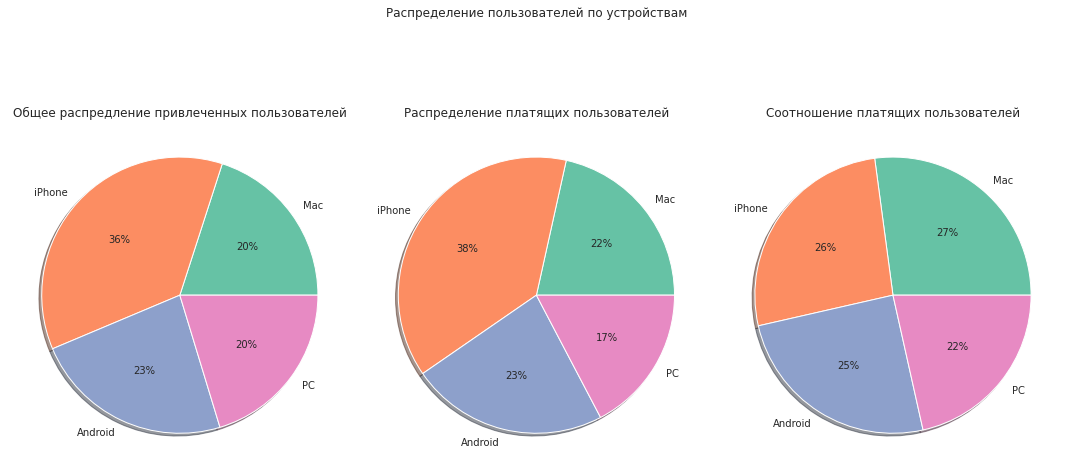

,device,not_paying_users,paying_users,total,share_of_paying
0,Mac,28130,1912,30042,6.364
1,iPhone,51097,3382,54479,6.208
2,Android,32982,2050,35032,5.852
3,PC,28918,1537,30455,5.047


In [18]:
attraction('device', 'устройствам')

Наиболее востребованным устройством среди пользователей является iPhone. 36% пользователей используют гаджет для работы с приложением. Также, владельцы iPhone больше, чем владельцы иных устройств, совершают покупок.

Компьютеры - Mac и PC, а также владельцы гаджетов под управлением Android распределены почти в равных долях по отношению друг к другу.

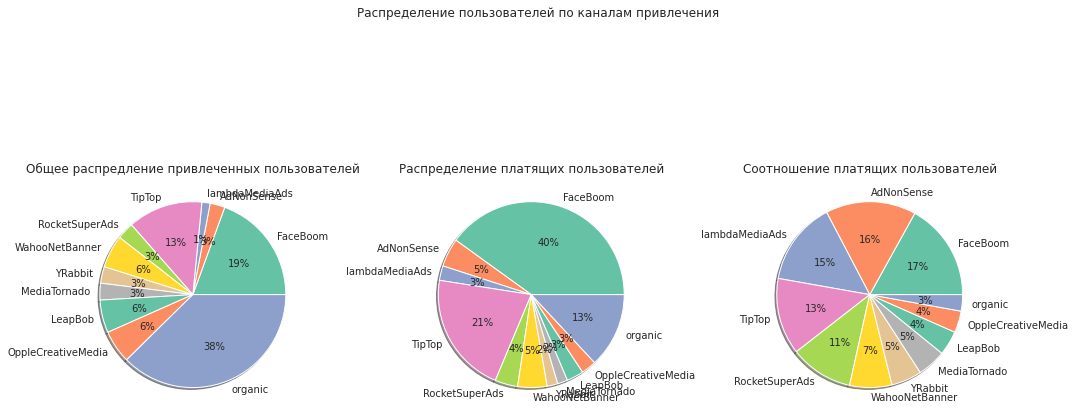

,channel,not_paying_users,paying_users,total,share_of_paying
0,FaceBoom,25587,3557,29144,12.205
1,AdNonSense,3440,440,3880,11.340
2,lambdaMediaAds,1924,225,2149,10.470
3,TipTop,17683,1878,19561,9.601
4,RocketSuperAds,4096,352,4448,7.914
5,WahooNetBanner,8100,453,8553,5.296
6,YRabbit,4147,165,4312,3.827
7,MediaTornado,4208,156,4364,3.575
8,LeapBob,8291,262,8553,3.063
9,OppleCreativeMedia,8372,233,8605,2.708


In [19]:
attraction('channel', 'каналам привлечения')

Наиболее активное привлечение пользователей шло по каналам FaceBoom и TipTop. 

Канал Faceboom больше других принес платящих пользователей.

### Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

Рассчитаем общие расходы:

In [20]:
expenses = costs['costs'].sum()
print('Всего потрачено денег:', expenses.round(1))

Всего потрачено денег: 105497.3


Определим сколько было потрачено денег на каждый источник привлечения:

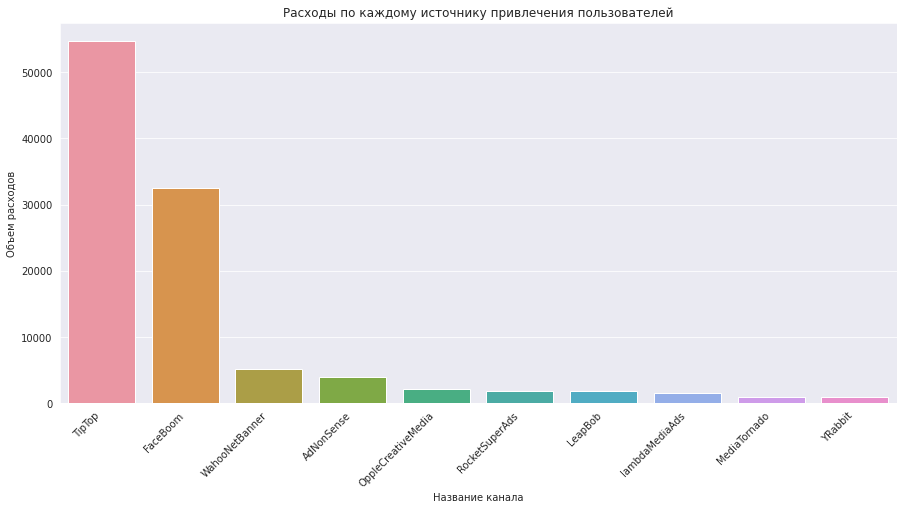

Расходы по каждому источнику привлечения пользователей:


,costs,perc_of_expens
channel,,
TipTop,"54,751.300",51.898
FaceBoom,"32,445.600",30.755
WahooNetBanner,"5,151.000",4.883
AdNonSense,"3,911.250",3.707
OppleCreativeMedia,"2,151.250",2.039
RocketSuperAds,"1,833.000",1.737
LeapBob,"1,797.600",1.704
lambdaMediaAds,"1,557.600",1.476
MediaTornado,954.480,0.905


In [21]:
channel_costs = costs.pivot_table(index='channel', 
                                     values='costs', 
                                     aggfunc='sum').sort_values(by='costs',
                                                                ascending=False)
channel_costs['perc_of_expens'] = channel_costs['costs']/expenses*100

plt.figure(figsize=(15,7))
chart = sns.barplot(x=channel_costs.index, y=channel_costs['costs'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Расходы по каждому источнику привлечения пользователей')
plt.xlabel('Название канала')
plt.ylabel('Объем расходов')
plt.show()

print('Расходы по каждому источнику привлечения пользователей:')
display(channel_costs)

Больше всего денег было вложено в источники TipTop и Faceboom. Расходы направленные на источник TipTop составляют почти 52% от общего объема расходов.

Теперь определим изменение расходов по времени:

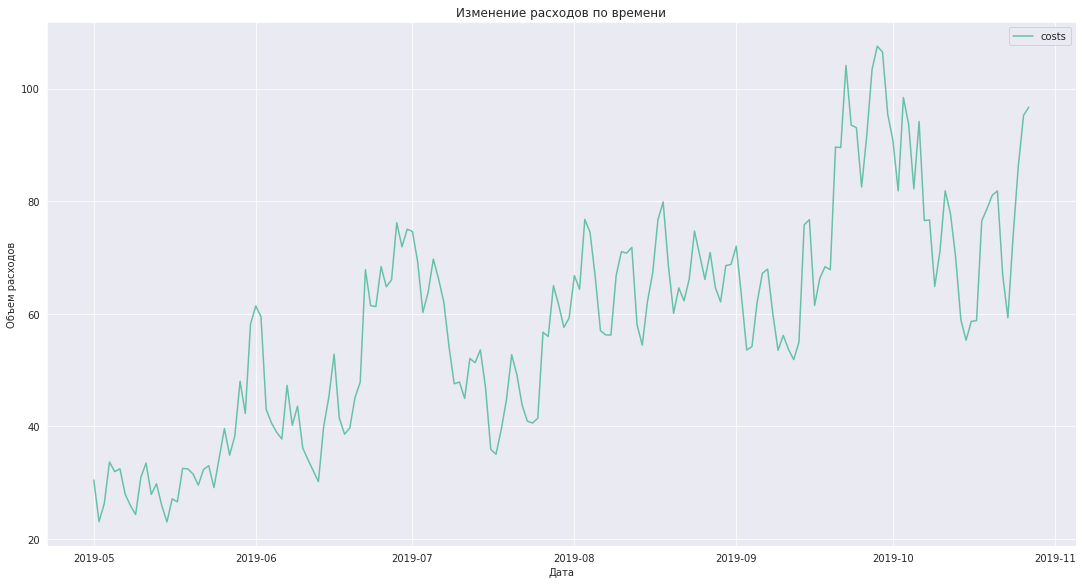

Изменение расходов по месяцам


,costs
dt,
2019-05,997.857
2019-06,"1,509.005"
2019-07,"1,644.706"
2019-08,"2,065.787"
2019-09,"2,244.134"
2019-10,"2,088.242"


In [22]:
costs_by_time = (costs.pivot_table(index='dt', 
                                   values='costs').sort_values(by='costs',
                                                               ascending=False))

costs_by_time.plot(style='-', grid=True, figsize=(15, 8))
plt.tight_layout()
plt.title('Изменение расходов по времени')
plt.xlabel('Дата')
plt.ylabel('Объем расходов')
plt.show()

print('Изменение расходов по месяцам')
temp_tab = costs_by_time.copy().reset_index()
temp_tab['dt'] = pd.to_datetime(temp_tab['dt'], format='%Y-%m-%d')
temp_tab = (temp_tab['costs'].groupby(temp_tab['dt'].dt.to_period('M')).sum()).to_frame()
temp_tab

Первое существенное увеличение расходов на привлечение пользователей произошло в июне 2019 года. Последующее увеличение расходов произошло в августе и сентябре.

Построим еще один график, посмотрим на распределение расходов по источникам привлечения и времени.

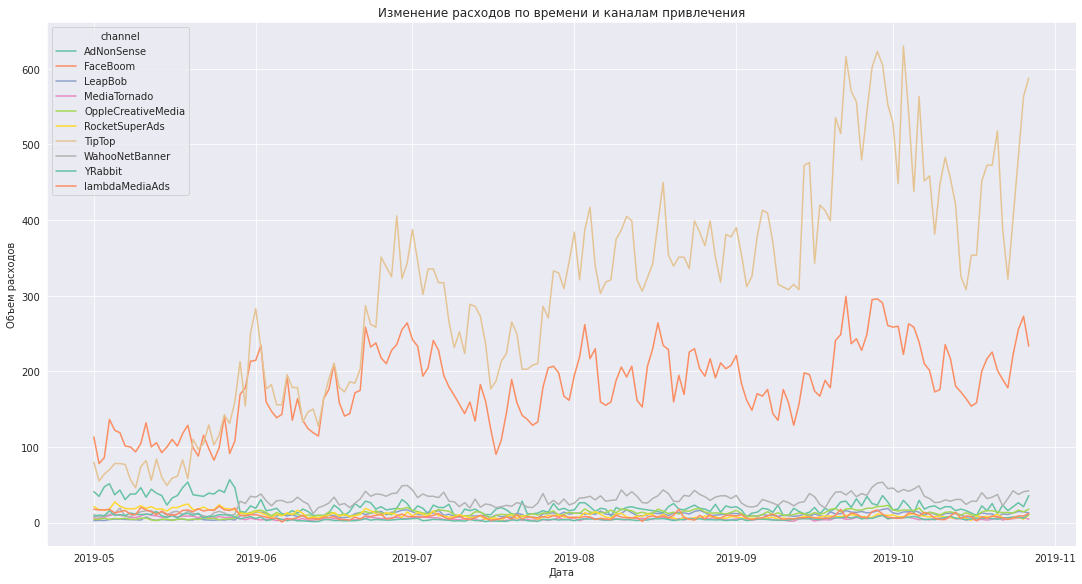

Изменение расходов по месяцам и каналам привлечения


channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,,,
2019-05,"1,169.700","3,524.400",140.280,238.560,169.750,577.980,"2,981.000",418.800,299.700,458.400
2019-06,538.650,"5,501.100",314.580,138.000,370.000,325.715,"6,675.600",921.000,106.200,199.200
2019-07,504.000,"5,294.300",313.530,138.480,366.500,252.070,"8,410.200",851.400,97.380,219.200
2019-08,579.600,"6,274.400",369.810,154.560,439.250,253.110,"11,202.000","1,040.400",124.740,220.000
2019-09,581.700,"6,114.900",343.980,144.720,427.750,218.400,"13,232.500",977.400,152.790,247.200
2019-10,537.600,"5,736.500",315.420,140.160,378.000,205.725,"12,250.000",942.000,163.410,213.600


In [23]:
costs_channel_by_time = costs.pivot_table(index='dt', 
                                     columns='channel', 
                                     values='costs', 
                                     aggfunc='sum')

costs_channel_by_time.plot(style='-', grid=True, figsize=(15, 8))
plt.tight_layout()
plt.title('Изменение расходов по времени и каналам привлечения')
plt.xlabel('Дата')
plt.ylabel('Объем расходов')
plt.show()

print('Изменение расходов по месяцам и каналам привлечения')
temp_tab = costs_channel_by_time.copy().reset_index()
temp_tab['dt'] = pd.to_datetime(temp_tab['dt'], format='%Y-%m-%d')
temp_tab = (temp_tab.groupby(temp_tab['dt'].dt.to_period('M')).sum())
temp_tab

По кривой изменения расходов в зависимости от времени заметно, что макисмальный объем денежных средств был направлен на каналы TipTop и FaceBoom.

Затраты на иные источники привлечения пользователей были минимальными.

Теперь определим общую среднюю стоимость привлечения одного покупателя и по каждому из источников привлечения.

In [24]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)
cac_mean = roi.loc['All users']['cac'].round(2)
print('Средняя стоимость привлечения одного покупателя (CAC):', cac_mean)

Средняя стоимость привлечения одного покупателя (CAC): 1.12


In [25]:
out_box1 = widgets.Output(layout={"border":"1px"})
out_box2 = widgets.Output(layout={"border":"1px"})

with out_box1:
    cac_mean_channel = profiles.pivot_table(index='channel',
                                            values='acquisition_cost',
                                            aggfunc='mean').sort_values(by='acquisition_cost',
                                                             ascending=False)
    cac_mean_channel = cac_mean_channel.drop(index=['organic'])
    print('Стоимость привлечения покупателя')
    display(cac_mean_channel)
    
with out_box2:
    cac_mean_channel.plot.pie(subplots=True,figsize=[7,7],
                          autopct='%1.0f%%', legend=False, 
                          shadow=True, cmap='Pastel1')
    plt.tight_layout()
    plt.title('Соотношение средней стоимости привлечения одного пользователя по источникам')
    plt.ylabel('Название источника')
    plt.show()

grid = GridspecLayout(10, 3)
grid[:, 0] = out_box1
grid[:, 1:4] = out_box2

grid

GridspecLayout(children=(Output(layout=Layout(border='1px', grid_area='widget001')), Output(layout=Layout(bord…

Самая высокая средняя стоимость привлечения одного покупателя у источника TipTop - 2.799. 

Самая низкая стоимость привлечения у источников OppleCreativeMedia - 0.250, YRabbit - 0.219, MediaTornado - 0.219, LeapBob - 0.210	

**Результаты исследования маркетинговой компании**

По итогам исследования маркетинга сделаем следующие выводы:
- На рекламную компанию было потрачено 105497.3
- 82.6% средств были направлены на два источника привлечения пользователей - TipTop - 51.9% и FaceBoom - 30.7%.
- Расходы двум этим источникам росли с течением времени, что в конечном счете определило общий тренд динамики расходов на рекламу с течением времени.
- Источник TipTop оказался самыми дорогими по стоимости привлечения одного клиента. Так, на привлечение одного пользователя через TipTop компания тратила 2.799, при cредней стоимости привлечения одного покупателя без учета органических пользователей в 1.12.
- По всем остальным источникам привлечения наблюдается стагнация расходов на рекламу.

### Оценка окупаемости рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируем общую окупаемость рекламы;
- Проанализируем окупаемость рекламы с разбивкой по устройствам;
- Проанализируем окупаемость рекламы с разбивкой по странам;
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

`Примечание:` из анализа будут исключены органические пользователи, поскольку стоимость привлечения таких пользователей равна нулю.

In [26]:
new_profiles = profiles.query('channel != "organic"')
new_profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,USA,2019-05-07,2019-05-01,True,1.088
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,USA,2019-07-09,2019-07-01,False,1.107
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,USA,2019-10-02,2019-10-01,False,0.231
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008


**Анализ общей окупаемости рекламы**

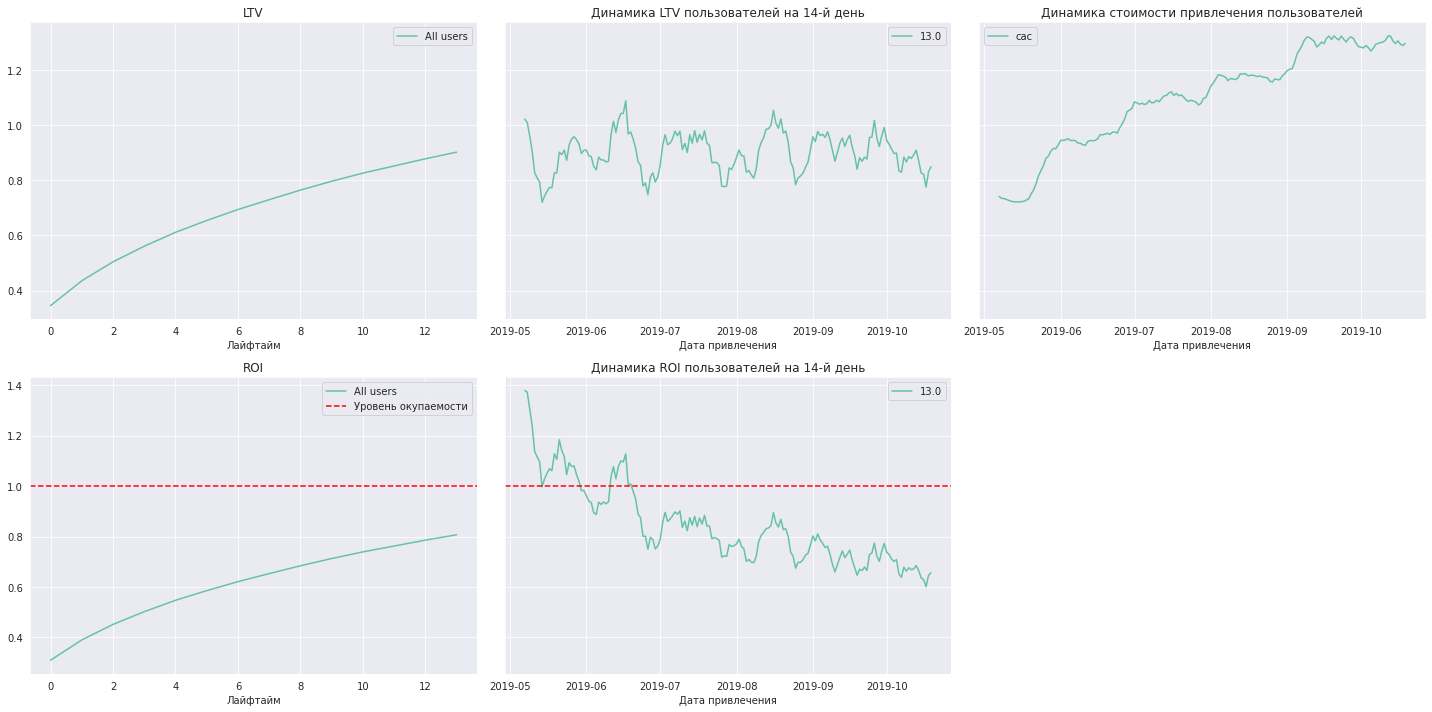

LTV


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,
All users,88644,0.346,0.436,0.505,0.561,0.611,0.654,0.694,0.730,0.765,0.797,0.826,0.852,0.878,0.902


ROI


,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohort,,,,,,,,,,,,,,,,
All users,88644,1.118,0.309,0.390,0.451,0.502,0.547,0.585,0.621,0.653,0.684,0.713,0.739,0.762,0.786,0.807


In [27]:
# считаем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    new_profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

print('LTV')
display(ltv)
print('ROI')
display(roi)

По графикам и таблицам можно сделать такие выводы:

* LTV не стабилен, что сведетельствует о низком качестве пользователей;

* За весь период динамика ROI отрицательная. По графику динамики ROI видно, что реклама окупалась в период с начала по конец мая и в середине июня;

* Параллельно, при отрицательной динамики ROI был увеличен объем затрат на рекламу, о чем свидетельствует положительная динамика стоимости привлечения пользователей;

* Показатель ROI по окончании двухнедельного периода находится на границе 80%. Реклама не окупается.

**Анализ окупаемости рекламы с разбивкой по устройствам**

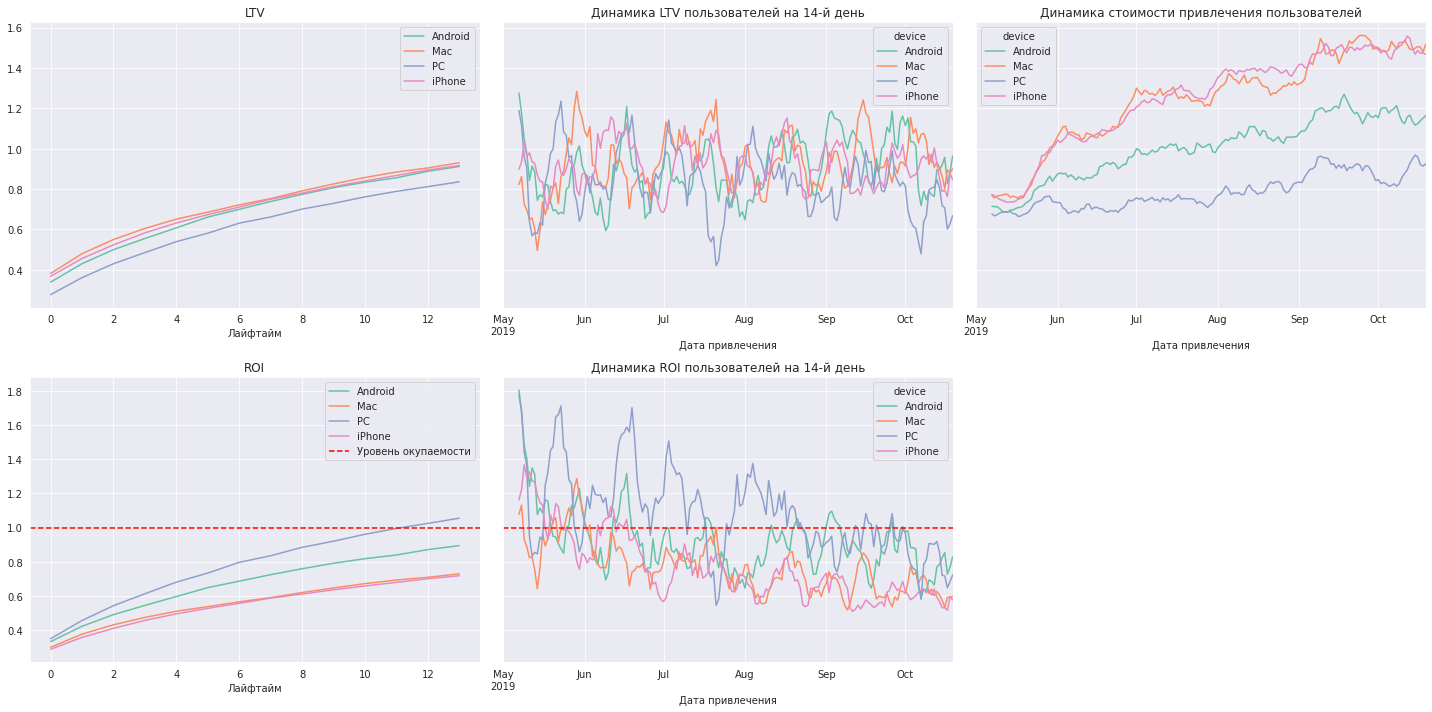

LTV


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20683,0.339,0.431,0.500,0.555,0.608,0.661,0.700,0.739,0.774,0.807,0.834,0.856,0.888,0.912
Mac,17747,0.382,0.480,0.550,0.605,0.651,0.686,0.722,0.753,0.791,0.825,0.857,0.884,0.905,0.931
PC,18128,0.277,0.362,0.430,0.486,0.540,0.582,0.631,0.662,0.701,0.729,0.762,0.789,0.812,0.836
iPhone,32086,0.368,0.456,0.524,0.583,0.632,0.674,0.711,0.750,0.780,0.812,0.840,0.867,0.894,0.917


ROI


,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,,
Android,20683,1.020,0.333,0.422,0.491,0.544,0.596,0.649,0.686,0.724,0.759,0.791,0.818,0.839,0.871,0.894
Mac,17747,1.276,0.300,0.376,0.431,0.474,0.510,0.537,0.566,0.590,0.620,0.647,0.672,0.693,0.709,0.729
PC,18128,0.793,0.350,0.456,0.543,0.613,0.681,0.734,0.796,0.835,0.884,0.920,0.961,0.995,1.024,1.055
iPhone,32086,1.277,0.288,0.357,0.410,0.457,0.495,0.527,0.557,0.587,0.611,0.636,0.658,0.679,0.700,0.718


In [28]:
# считаем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    new_profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

print('LTV')
display(ltv)
print('ROI')
display(roi)

На основе графиков и таблиц были сделаны следующие выводы:
- Самый высокий показатель LTV у пользователей с устройствами Mac, самый низкий у пользователей PC;
- В период с мая по июль окупались пользователи на всех платформах. Начиная с июля по октябрь черту окупаемости пересекали только пользователи на PC, а также часть пользователей с Android-устойствами;
- Судя по графику динамики стоимости привлечения пользователей был существено увеличен бюджет, направленный на привлечение пользователей с устройствами Mac, Android и iPhone.

**Анализ окупаемости рекламы с разбивкой по странам**

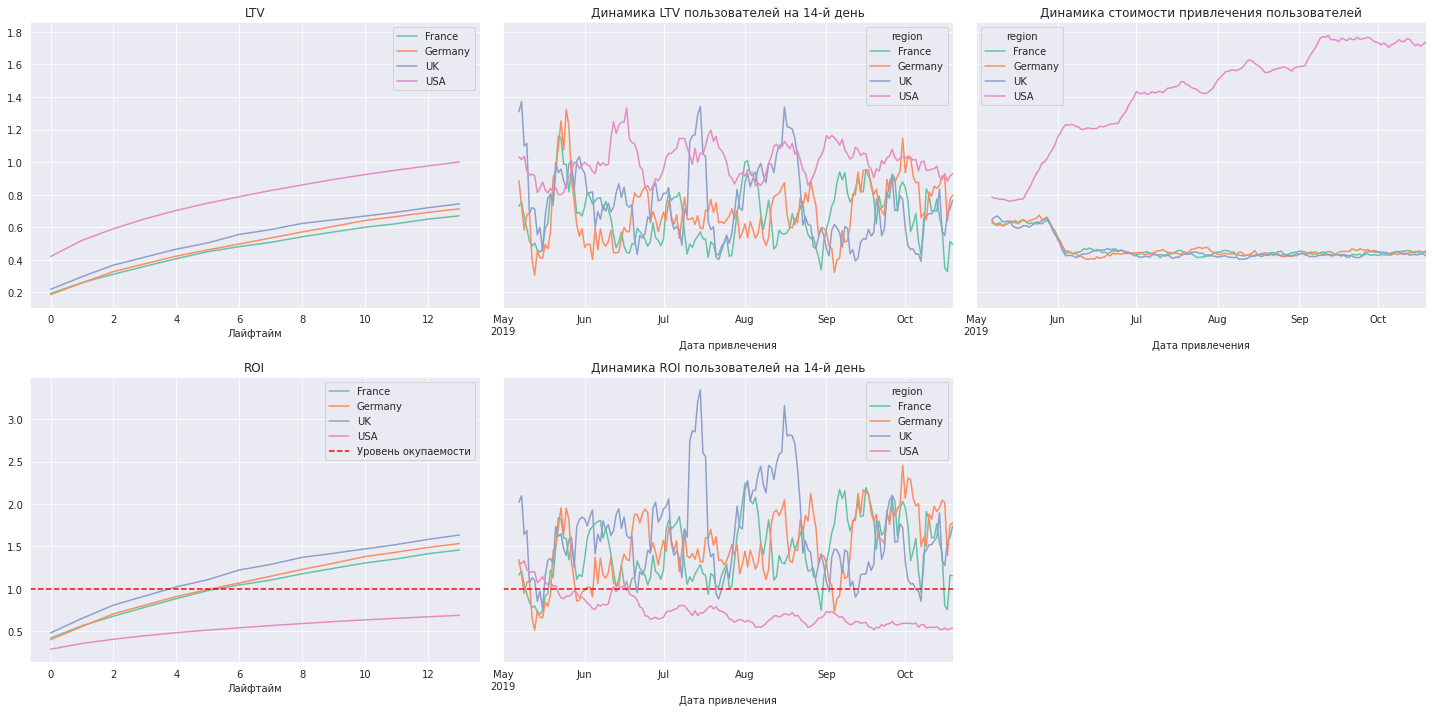

LTV


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,10516,0.193,0.260,0.312,0.360,0.407,0.450,0.481,0.507,0.541,0.571,0.600,0.622,0.650,0.670
Germany,9030,0.186,0.259,0.328,0.375,0.423,0.461,0.497,0.534,0.571,0.605,0.642,0.666,0.691,0.713
UK,10536,0.219,0.297,0.368,0.417,0.466,0.504,0.556,0.586,0.624,0.646,0.669,0.692,0.720,0.743
USA,58562,0.420,0.520,0.591,0.652,0.704,0.748,0.788,0.826,0.860,0.894,0.924,0.951,0.976,1.001


ROI


,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,,
France,10516,0.460,0.421,0.565,0.678,0.783,0.885,0.979,1.046,1.103,1.178,1.242,1.305,1.352,1.413,1.458
Germany,9030,0.465,0.401,0.557,0.705,0.808,0.909,0.991,1.069,1.149,1.228,1.302,1.380,1.432,1.487,1.534
UK,10536,0.455,0.481,0.652,0.808,0.916,1.023,1.108,1.222,1.287,1.371,1.419,1.470,1.522,1.582,1.634
USA,58562,1.456,0.289,0.357,0.406,0.448,0.483,0.514,0.541,0.567,0.591,0.614,0.634,0.653,0.671,0.688


In [29]:
# считаем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    new_profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

print('LTV')
display(ltv)
print('ROI')
display(roi)

Интересно обстоят дела с окупаемостью рекламы по странам:
- Самая высокая пожизненная ценность пользователей из США. В остальных регионах показатель LTV существенно ниже;
- Качество пользователей по всем странам осавляет желать лучшего - показатель LTV крайне не стабилен;
- По графику динамики стоимости привлечения пользователей видно, что дороже всего компании обходится привлечение пользователей из США, и месяц за месцом расходы продолжают увеличиваться. В то же время к июню CAC по другим странам был снижен и в дальнейшем стабилизирован;
- За чертой окупаемости находятся пользователи из Франции, Германии и Великобритании. В тоже время, привлеченные пользователи из США стабильно не окупаются.

**Анализ окупаемости рекламы с разбивкой по рекламным каналам**

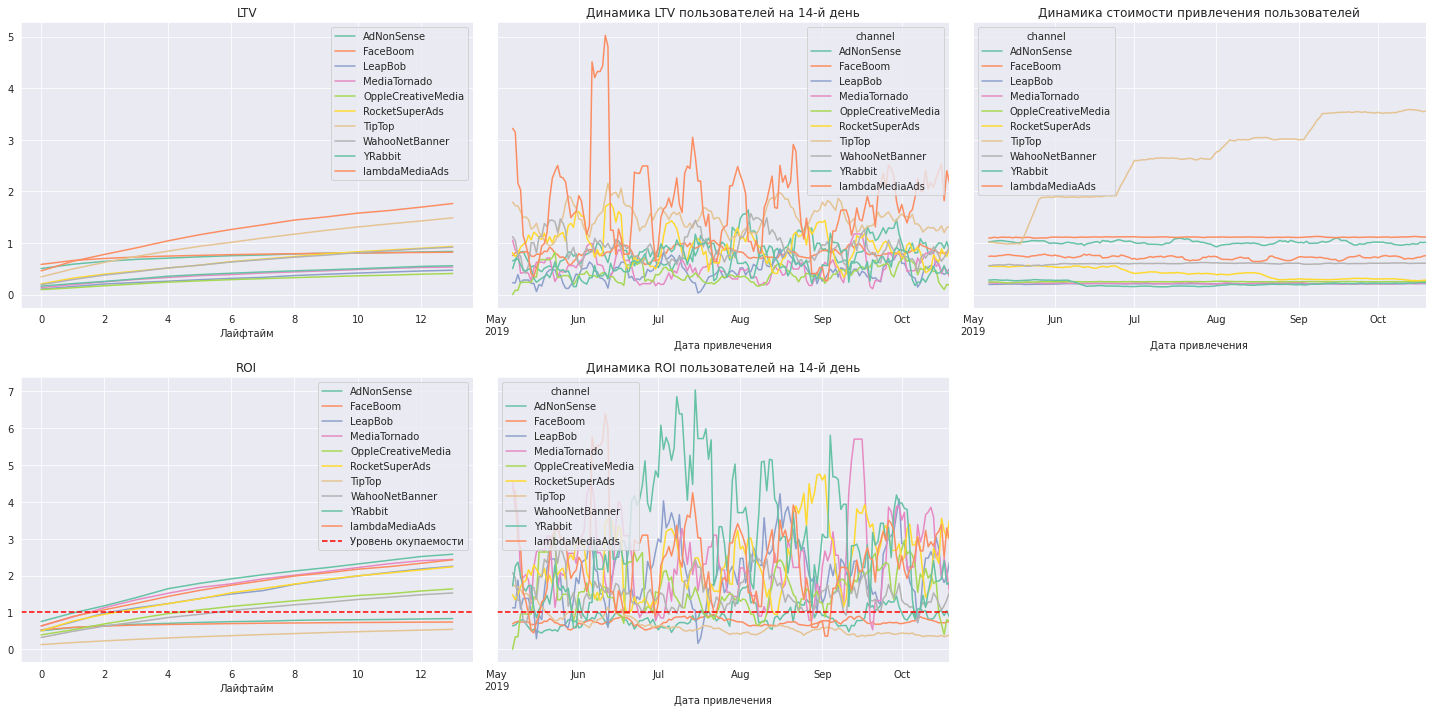

LTV


,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.505,0.589,0.644,0.684,0.707,0.733,0.754,0.768,0.789,0.803,0.807,0.815,0.827,0.838
FaceBoom,27544,0.586,0.661,0.701,0.729,0.747,0.760,0.775,0.785,0.792,0.801,0.806,0.812,0.817,0.821
LeapBob,8103,0.107,0.156,0.206,0.235,0.260,0.289,0.315,0.334,0.370,0.394,0.418,0.438,0.458,0.473
MediaTornado,4167,0.137,0.192,0.247,0.294,0.332,0.367,0.389,0.418,0.440,0.462,0.486,0.508,0.526,0.534
OppleCreativeMedia,8139,0.097,0.132,0.172,0.207,0.241,0.266,0.290,0.310,0.329,0.347,0.364,0.377,0.395,0.409
RocketSuperAds,4251,0.208,0.319,0.396,0.456,0.516,0.571,0.639,0.687,0.738,0.790,0.831,0.864,0.899,0.934
TipTop,18498,0.344,0.497,0.624,0.740,0.842,0.936,1.014,1.096,1.171,1.245,1.311,1.371,1.428,1.488
WahooNetBanner,8082,0.191,0.291,0.379,0.444,0.517,0.569,0.632,0.678,0.725,0.765,0.813,0.849,0.889,0.919
YRabbit,4102,0.163,0.213,0.256,0.304,0.356,0.388,0.415,0.439,0.461,0.480,0.502,0.524,0.546,0.560


ROI


,cohort_size,cac,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,,
AdNonSense,3702,1.008,0.501,0.584,0.639,0.678,0.701,0.727,0.748,0.762,0.783,0.796,0.801,0.809,0.821,0.831
FaceBoom,27544,1.113,0.526,0.594,0.629,0.655,0.671,0.683,0.696,0.705,0.712,0.719,0.724,0.729,0.734,0.738
LeapBob,8103,0.210,0.510,0.741,0.979,1.121,1.236,1.374,1.498,1.590,1.760,1.877,1.988,2.085,2.179,2.252
MediaTornado,4167,0.219,0.628,0.875,1.127,1.341,1.517,1.675,1.774,1.911,2.009,2.107,2.217,2.321,2.403,2.437
OppleCreativeMedia,8139,0.250,0.389,0.527,0.687,0.827,0.965,1.065,1.161,1.239,1.315,1.388,1.457,1.507,1.581,1.637
RocketSuperAds,4251,0.417,0.497,0.763,0.949,1.092,1.235,1.368,1.531,1.646,1.768,1.893,1.992,2.071,2.153,2.237
TipTop,18498,2.758,0.125,0.180,0.226,0.268,0.305,0.339,0.368,0.398,0.425,0.452,0.476,0.497,0.518,0.540
WahooNetBanner,8082,0.602,0.318,0.484,0.630,0.737,0.859,0.946,1.050,1.127,1.205,1.272,1.350,1.411,1.478,1.526
YRabbit,4102,0.217,0.752,0.983,1.179,1.400,1.641,1.787,1.910,2.022,2.123,2.213,2.314,2.414,2.516,2.578


In [30]:
# считаем LTV и ROI
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    new_profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

print('LTV')
display(ltv)
print('ROI')
display(roi)

Не менее интересна картина и по источникам привлечения:
- Самый высокий показатель LTV у пользователей пришедших с источников TipTop и lambdaMediaAds;
- CAC почти по всем источникам стабилен за исключением TipTop - начиная с мая наблюдается постоянное повышение стоимости привлечения пользователей по этому источнику;
- Убыточными являются каналы: AdNonSense, FaceBoom, TipTop. Самая высокая окупаемость у канала lambdaMediaAds. 

### Оценка конверсии и удержания
С помощью конверсии и удержания разберемся в причинах проблем окупаемости.
- Проанализируем конверсию и удержание с разбивкой по устройствам;
- Проанализируем конверсию и удержание с разбивкой по странам;
- Проанализируем конверсию и удержание с разбивкой по рекламным каналам.

**Анализ конверсии и удержания с разбивкой по устройствам**

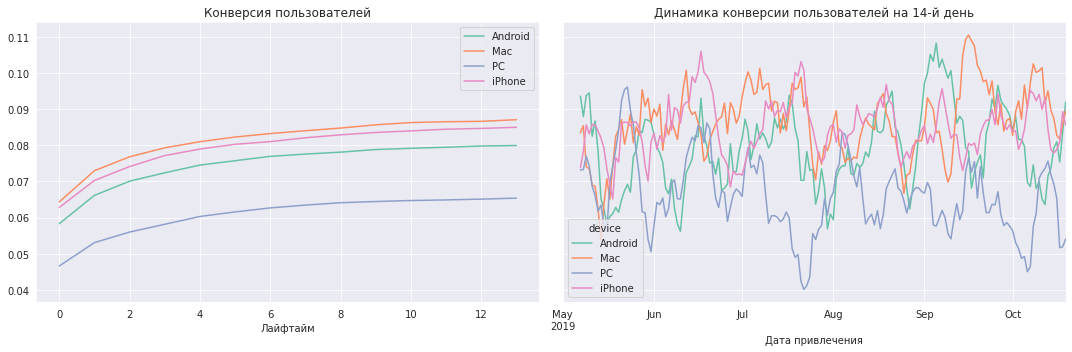

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
device,,,,,,,,,,,,,,,
Android,20683,0.058,0.066,0.070,0.072,0.075,0.076,0.077,0.078,0.078,0.079,0.079,0.079,0.080,0.080
Mac,17747,0.064,0.073,0.077,0.079,0.081,0.082,0.083,0.084,0.085,0.086,0.086,0.086,0.087,0.087
PC,18128,0.047,0.053,0.056,0.058,0.060,0.062,0.063,0.063,0.064,0.064,0.065,0.065,0.065,0.065
iPhone,32086,0.063,0.070,0.074,0.077,0.079,0.080,0.081,0.082,0.083,0.084,0.084,0.084,0.085,0.085


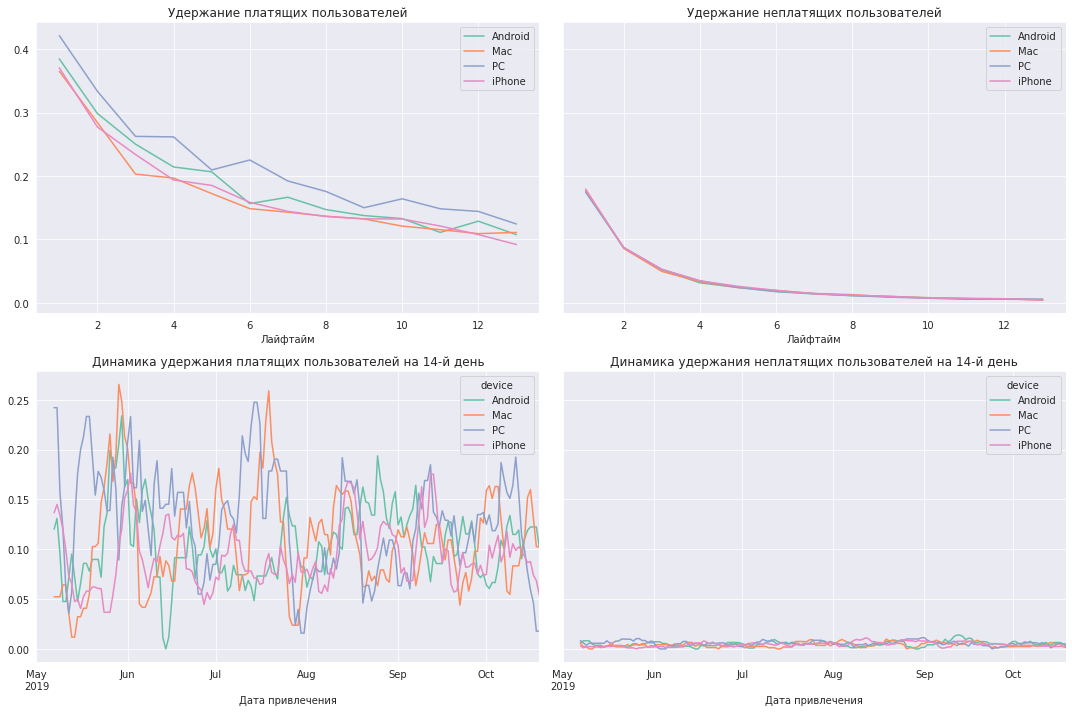

cohort_size     0     1     2     3     4     5     6     7  \
payer device                                                                 
False Android        18988 1.000 0.175 0.086 0.052 0.031 0.024 0.017 0.014   
      Mac            16150 1.000 0.179 0.086 0.049 0.033 0.024 0.020 0.015   
      PC             16920 1.000 0.175 0.087 0.052 0.035 0.024 0.018 0.015   
      iPhone         29276 1.000 0.178 0.087 0.053 0.035 0.026 0.019 0.014   
True  Android         1695 1.000 0.385 0.299 0.250 0.214 0.206 0.156 0.166   
      Mac             1597 1.000 0.365 0.284 0.203 0.197 0.172 0.148 0.143   
      PC              1208 1.000 0.421 0.334 0.262 0.262 0.209 0.225 0.192   
      iPhone          2810 1.000 0.370 0.277 0.234 0.194 0.185 0.158 0.144   

                  8     9    10    11    12    13  
payer device                                       
False Android 0.011 0.010 0.008 0.007 0.005 0.005  
      Mac     0.013 0.009 0.008 0.006 0.006 0.004  
      PC      0.011 0.009 0.007 0.005 0.006 0.006  
      iPhone  0.012 0.010 0.007 0.007 0.006 0.004  
True  Android 0.147 0.137 0.133 0.111 0.129 0.107  
      Mac     0.137 0.132 0.121 0.115 0.109 0.111  
      PC      0.175 0.150 0.164 0.148 0.144 0.124  
      iPhone  0.136 0.132 0.132 0.121 0.107 0.092

In [35]:
conversion_raw, conversion, conversion_history = get_conversion(
    new_profiles, orders, observation_date, horizon_days, dimensions=['device']
)

retention_raw, retention, retention_history = get_retention(
    new_profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion, conversion_history, horizon_days, window=7)
display(conversion)

plot_retention(retention, retention_history, horizon_days, window=7)
display(retention)

- Пользователи Mac, iPhone и Android-устройств конвертируются очень хорошо и постоянно, чего не скажешь про пользователей PC - уровень конверсии самый низкий и нестабильный из всех устройств;
- Пользователи Mac, iPhone и Android-устройств удерживаются хуже чем пользователи PC.

**Анализ конверсии и удержания с разбивкой по странам**

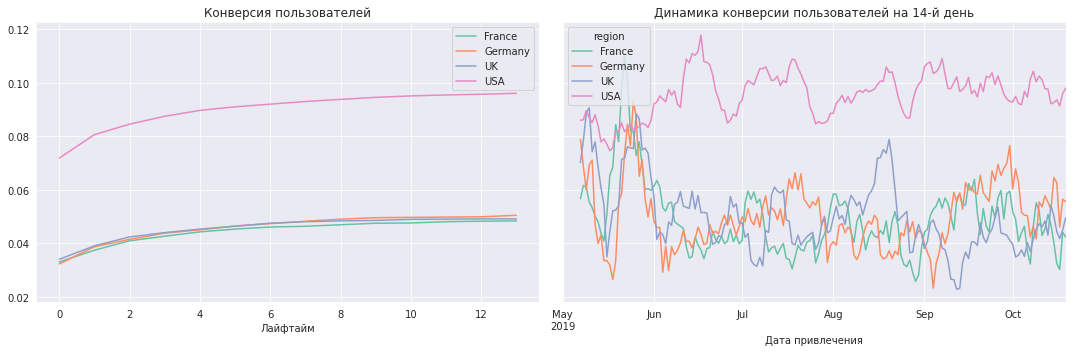

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
region,,,,,,,,,,,,,,,
France,10516,0.033,0.037,0.041,0.043,0.044,0.045,0.046,0.046,0.047,0.048,0.048,0.048,0.048,0.048
Germany,9030,0.032,0.039,0.042,0.044,0.045,0.047,0.047,0.048,0.049,0.050,0.050,0.050,0.050,0.050
UK,10536,0.034,0.039,0.042,0.044,0.045,0.046,0.048,0.048,0.048,0.049,0.049,0.049,0.049,0.049
USA,58562,0.072,0.081,0.085,0.087,0.090,0.091,0.092,0.093,0.094,0.095,0.095,0.095,0.096,0.096


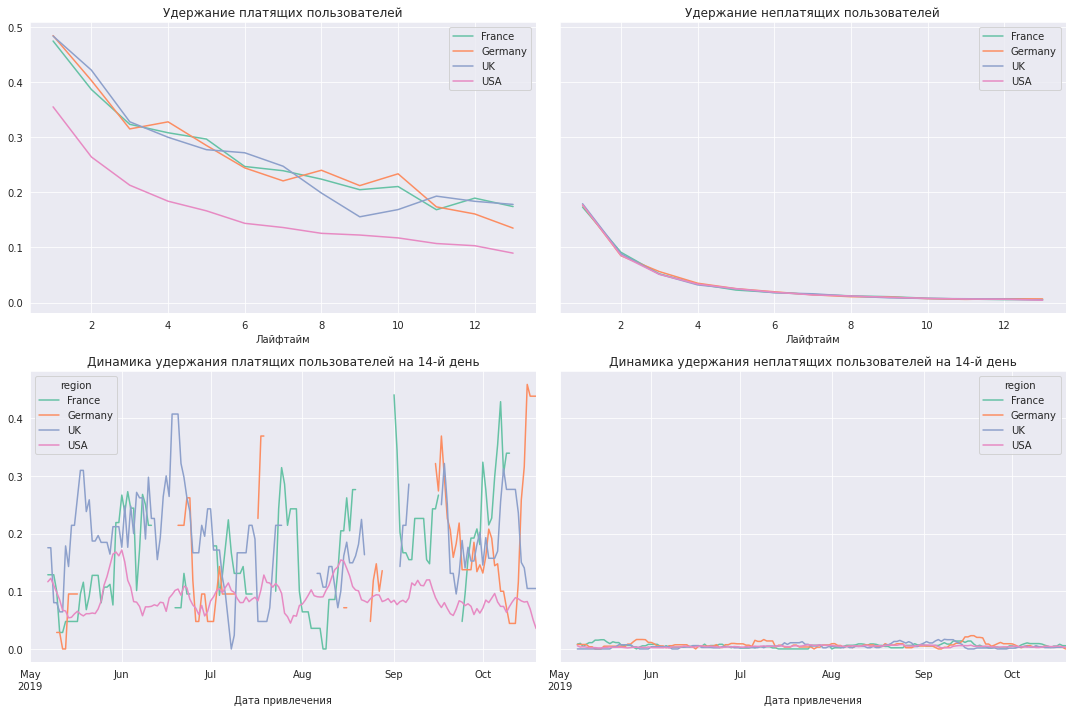

cohort_size     0     1     2     3     4     5     6     7  \
payer region                                                                 
False France          9993 1.000 0.173 0.091 0.052 0.034 0.023 0.018 0.015   
      Germany         8563 1.000 0.177 0.085 0.056 0.035 0.025 0.020 0.014   
      UK             10002 1.000 0.179 0.089 0.051 0.032 0.025 0.018 0.016   
      USA            52776 1.000 0.177 0.086 0.051 0.034 0.025 0.019 0.014   
True  France           523 1.000 0.474 0.386 0.323 0.308 0.296 0.247 0.239   
      Germany          467 1.000 0.484 0.403 0.315 0.328 0.285 0.244 0.221   
      UK               534 1.000 0.483 0.421 0.328 0.300 0.277 0.272 0.247   
      USA             5786 1.000 0.355 0.264 0.213 0.184 0.166 0.144 0.136   

                  8     9    10    11    12    13  
payer region                                       
False France  0.012 0.011 0.008 0.006 0.005 0.006  
      Germany 0.011 0.010 0.007 0.006 0.007 0.007  
      UK      0.012 0.008 0.007 0.007 0.006 0.004  
      USA     0.012 0.009 0.008 0.006 0.006 0.004  
True  France  0.224 0.205 0.210 0.168 0.189 0.174  
      Germany 0.240 0.212 0.233 0.173 0.161 0.135  
      UK      0.199 0.155 0.169 0.193 0.184 0.178  
      USA     0.125 0.122 0.117 0.107 0.103 0.090

In [32]:
conversion_raw, conversion, conversion_history = get_conversion(
    new_profiles, orders, observation_date, horizon_days, dimensions=['region']
)

retention_raw, retention, retention_history = get_retention(
    new_profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion, conversion_history, horizon_days)
display(conversion)

plot_retention(retention, retention_history, horizon_days)
display(retention)

- Пользователи из США очень хорошо конвертируются, однако хуже всего удерживаются.
- Пользователи из Франции, Германии и Великобритании имеют примерно одинаковый процент конверсии - 4%, и удержания - диапазон от 16% до 20%.

**Анализ конверсии и удержания с разбивкой по источникам привлечения пользователей**

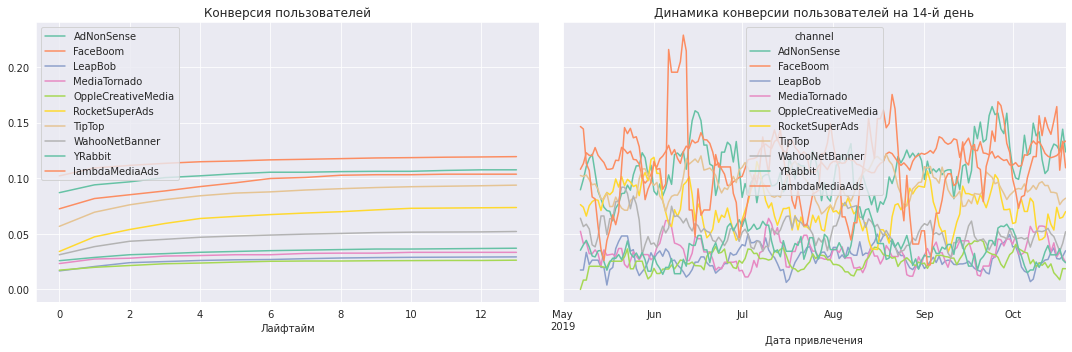

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.087,0.094,0.097,0.100,0.102,0.104,0.105,0.105,0.106,0.106,0.106,0.107,0.108,0.108
FaceBoom,27544,0.102,0.109,0.111,0.113,0.115,0.115,0.116,0.117,0.118,0.118,0.118,0.119,0.119,0.119
LeapBob,8103,0.017,0.021,0.024,0.025,0.026,0.027,0.027,0.028,0.028,0.029,0.029,0.029,0.029,0.029
MediaTornado,4167,0.023,0.027,0.028,0.030,0.030,0.031,0.031,0.032,0.033,0.033,0.033,0.033,0.033,0.033
OppleCreativeMedia,8139,0.017,0.020,0.022,0.023,0.024,0.025,0.025,0.026,0.026,0.026,0.026,0.026,0.026,0.026
RocketSuperAds,4251,0.034,0.047,0.054,0.059,0.064,0.066,0.067,0.069,0.070,0.072,0.073,0.073,0.073,0.074
TipTop,18498,0.057,0.069,0.076,0.081,0.084,0.087,0.088,0.089,0.091,0.092,0.092,0.093,0.093,0.094
WahooNetBanner,8082,0.031,0.038,0.043,0.045,0.047,0.048,0.049,0.050,0.050,0.051,0.051,0.052,0.052,0.052
YRabbit,4102,0.026,0.029,0.031,0.032,0.033,0.034,0.035,0.035,0.036,0.036,0.036,0.037,0.037,0.037


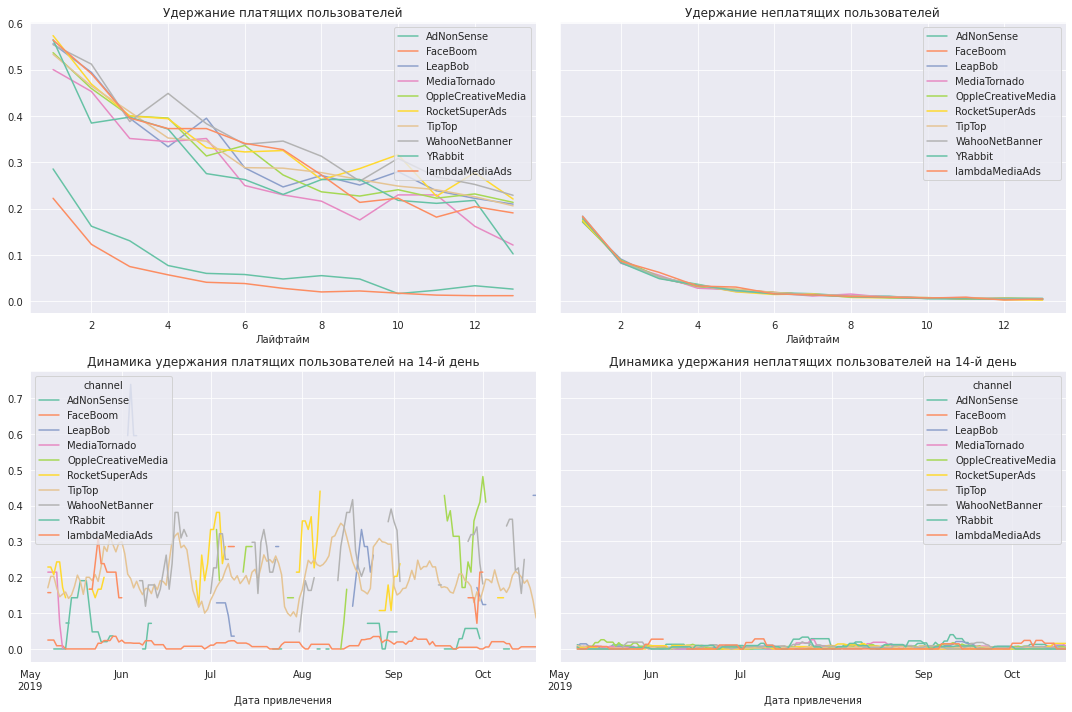

cohort_size     0     1     2     3     4     5  \
payer channel                                                               
False AdNonSense                 3289 1.000 0.176 0.088 0.051 0.037 0.022   
      FaceBoom                  24182 1.000 0.173 0.087 0.051 0.033 0.025   
      LeapBob                    7860 1.000 0.171 0.091 0.051 0.032 0.023   
      MediaTornado               4019 1.000 0.183 0.082 0.056 0.029 0.025   
      OppleCreativeMedia         7919 1.000 0.172 0.089 0.053 0.032 0.026   
      RocketSuperAds             3916 1.000 0.175 0.086 0.051 0.035 0.021   
      TipTop                    16713 1.000 0.182 0.085 0.051 0.035 0.026   
      WahooNetBanner             7654 1.000 0.184 0.085 0.053 0.034 0.022   
      YRabbit                    3946 1.000 0.180 0.083 0.049 0.035 0.024   
      lambdaMediaAds             1836 1.000 0.183 0.087 0.063 0.033 0.031   
True  AdNonSense                  413 1.000 0.286 0.162 0.131 0.077 0.061   
      FaceBoom                   3362 1.000 0.222 0.123 0.075 0.057 0.041   
      LeapBob                     243 1.000 0.556 0.494 0.395 0.333 0.395   
      MediaTornado                148 1.000 0.500 0.453 0.351 0.345 0.351   
      OppleCreativeMedia          220 1.000 0.536 0.459 0.400 0.395 0.314   
      RocketSuperAds              335 1.000 0.573 0.469 0.400 0.394 0.331   
      TipTop                     1785 1.000 0.533 0.464 0.409 0.352 0.346   
      WahooNetBanner              428 1.000 0.554 0.512 0.388 0.449 0.383   
      YRabbit                     156 1.000 0.564 0.385 0.397 0.372 0.276   
      lambdaMediaAds              220 1.000 0.564 0.491 0.395 0.373 0.373   

                             6     7     8     9    10    11    12    13  
payer channel                                                             
False AdNonSense         0.019 0.017 0.011 0.011 0.006 0.005 0.007 0.007  
      FaceBoom           0.020 0.014 0.012 0.010 0.008 0.005 0.007 0.004  
      LeapBob            0.019 0.015 0.011 0.010 0.007 0.007 0.005 0.005  
      MediaTornado       0.019 0.012 0.016 0.008 0.007 0.009 0.004 0.005  
      OppleCreativeMedia 0.019 0.015 0.012 0.008 0.008 0.006 0.007 0.006  
      RocketSuperAds     0.015 0.016 0.009 0.008 0.007 0.008 0.004 0.003  
      TipTop             0.019 0.014 0.012 0.010 0.007 0.007 0.006 0.004  
      WahooNetBanner     0.018 0.015 0.012 0.010 0.007 0.007 0.006 0.005  
      YRabbit            0.016 0.014 0.010 0.008 0.006 0.006 0.005 0.005  
      lambdaMediaAds     0.016 0.014 0.011 0.009 0.008 0.009 0.003 0.005  
True  AdNonSense         0.058 0.048 0.056 0.048 0.017 0.024 0.034 0.027  
      FaceBoom           0.039 0.028 0.021 0.023 0.018 0.014 0.012 0.012  
      LeapBob            0.288 0.247 0.272 0.251 0.280 0.239 0.222 0.210  
      MediaTornado       0.250 0.230 0.216 0.176 0.230 0.230 0.162 0.122  
      OppleCreativeMedia 0.336 0.273 0.236 0.227 0.241 0.223 0.232 0.214  
      RocketSuperAds     0.322 0.325 0.263 0.287 0.316 0.227 0.278 0.221  
      TipTop             0.289 0.287 0.278 0.263 0.249 0.241 0.226 0.206  
      WahooNetBanner     0.339 0.346 0.313 0.259 0.308 0.269 0.252 0.229  
      YRabbit            0.263 0.231 0.263 0.263 0.218 0.212 0.218 0.103  
      lambdaMediaAds     0.341 0.327 0.273 0.214 0.223 0.182 0.205 0.191

In [33]:
conversion_raw, conversion, conversion_history = get_conversion(
    new_profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

retention_raw, retention, retention_history = get_retention(
    new_profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion, conversion_history, horizon_days)
display(conversion)

plot_retention(retention, retention_history, horizon_days)
display(retention)

- Очень хорошо конвертируются пользователи привлеченные по каналам AdNonSense, FaceBoom, lambdaMediaAds.
- Пользователи привлеченные через источник FaceBoom имеют самый низкий показатель удержания - 1%, а также AdNonSense с показателем удержания в 3% к концу второй недели

### Выводы по итогам исследовательского анализа данных

Итак, по итогам исследовательского анализа данных мы знаем:

**Страны**
- Наибольший процент пользователей приложения Procrastinate Pro+ сосредоточен в США - 67% от общего числа пользователей;
- Самая высокая пожизненная ценность пользователей из США, однако их привлечение обходится компании дороже всего;
- Средства направленные на привлечение пользователей из США стабильно не окупаются;
- Пользователи из США чаще чем пользователи из других стран начинают совершать покупки, однако примерно только 9% из числа привлеченных платящих пользователй продолжают использовать приложение.

**Устройства**

- Наиболее востребованным устройством среди пользователей прложения является iPhone. 36% пользователей используют гаджет для работы с приложением. Также, владельцы iPhone больше других совершают покупок;
- Самый высокий показатель LTV у пользователей с устройствами Mac, самый низкий у пользователей PC;
- Несмотря на то, что компания старается привлечь пользователей Mac, iPhone и Android-устройств, которые хорошо и стабильно конвертируются в платящих, данные пользователи удерживаются хуже, чем пользователи PC.

**Источники привлечения пользователей**

- Больше всего денег было вложено в источники TipTop и Faceboom. Расходы направленные на источник TipTop составляют почти 52% от общего объема расходов. При этом, данный канал, как и AdNonSense, FaceBoom оказались полностью убыточными;
- Пользователи привлеченные через источник FaceBoom имеют самый низкий показатель удержания - 1%;
- Самым привлекательным является канал lambdaMediaAds -  пользователи пришедшие через этот канал хорошо конвертируются в платящих, их LTV является самым высоким, они имеют низкую стоимость привлечения и стабильно окупаются.

## Выводы по результатам исследования

**Причины неэффективности привлечения пользователей**

- 83% средств затараченных на рекламу были направлены на абсолютно убыточные каналы - TipTop и FaceBoom. Пользователи привлекаемые по этим каналам так и не смогли выйти на уровень окупаемости на протяжении всего исследуемого периода;
- Компания постоянно увеличивала рекламный бюджет направленный на привлечение пользователей из США, однако привлечение этих пользователй так и не окупилось;
- В основном, рекламный бюджет был направлен на группы пользователей которые хорошо конвертируются в платящих - по странам интересны были только пользователи из США; по устройствам - Mac, iPhone; по источникам - AdNonSense, FaceBoom, TipTop. Однако все целевые группы пользователей имели крайни низкий коэффициент удержания, что не позволило получить компании потенциальную прибыль. По итогу, большая часть рекламного бюджет была направлена на пользователей которые быстро конвертировались, но не удерживались;
- Пользователи всех устройств за исключением PC так и не смогли выйти на уровень окупаемости.

**Рекомендации для отдела маркетинга**
- Направить рекламный бюджет на привлечение пользователей из Великобритании, Франции и Германии. Пользователи из этих стран хорошо удерживаются и выходят на уровень окупаемости к концу двухнедельного лайфтайма;
- Работатать над поднятием индекса NPS и как следствие, опсредованно влиять на удержание привлеченных пользователей.
- Привлекать больше пользователей PC - они приносят стабильную прибыль компании и хорошо удерживаются, однако хуже других конвертируются в платящих. Необходимо стимулировать покательскую активность на данной платформе
- Использовать в качестве каналов привлечения, представленные в таблице источники. Пользователи пришедшие через эти каналы хорошо конвертируются в платящих и удерживаются, их LTV является досточно высоким, они имеют низкую стоимость привлечения и стабильно окупаются.

|Канал         |LTV  |CAC  |ROI  |Конверсия|Удержание|
|:-------------|:---:|:---:|:---:|:-------:|:-------:|
|LeapBob       |0.473|0.210|2.252|2.9%     |21%      |
|RocketSuperAds|0.934|0.417|2.237|7.4%     |22.1%    |
|WahooNetBanner|0.919|0.602|1.526|5.2%     |22.9%    |
|lambdaMediaAds|1.766|0.727|2.429|10.4%    |19.1%    |